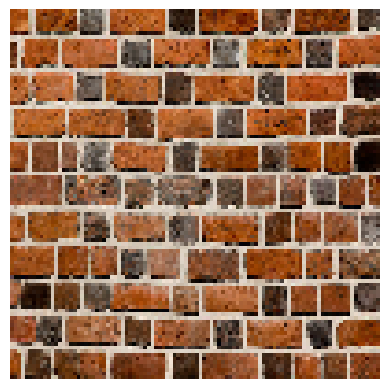

Prosecna vrednost R kanala svakog desetog pixela je: 140.65


In [ ]:
import cv2;
from matplotlib import pyplot as plt;

# Zadatak 1------------------------------------------------------
# Ucitaj sliku
image = cv2.imread('z1_slika1.jpg');
resized_image = cv2.resize(image, (100, 100))

# Ne radi mi cv2_imshow, moram ovako
resized_image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

# Pokazi sliku koristeci Matplotlib
plt.imshow(resized_image_rgb)
plt.axis('off')
plt.show()
# Izracunaj prosecnu vrednost R kanala svakog desetog pixela slike
average_red_values = []

for i in range(0, resized_image_rgb.shape[0], 10):
    for j in range(0, resized_image_rgb.shape[1], 10):
        pixel = resized_image_rgb[i, j]
        average_red = pixel[0]  # Vrednost r kanala
        average_red_values.append(average_red)

# Izracunaj average
overall_average_red = sum(average_red_values) / len(average_red_values)

print("Prosecna vrednost R kanala svakog desetog pixela je:", overall_average_red)
# Zadatak 1------------------------------------------------------

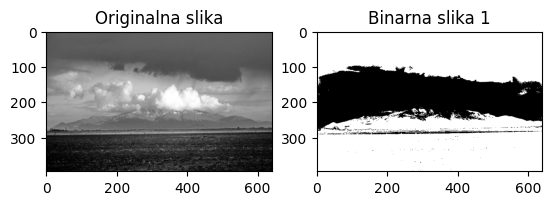

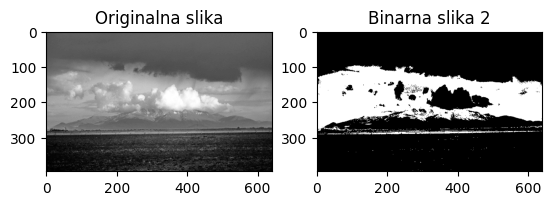

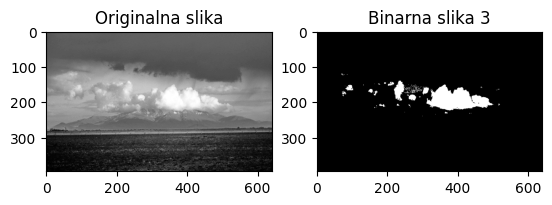

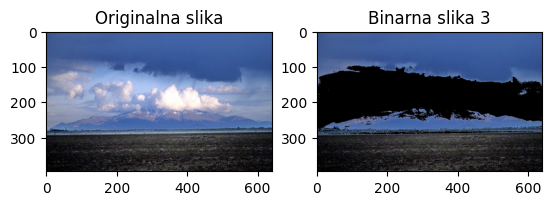

In [ ]:
# Zadatak 2------------------------------------------------------
# Ucitaj sliku
import numpy as np

# Ucitaj sa openCV
image = cv2.imread('z2_slika1.jpg', cv2.IMREAD_GRAYSCALE)
image_RGB = cv2.imread('z2_slika1.jpg')

# Binarizacija slike
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
binary_image = cv2.bitwise_not(binary_image)
mask = binary_image

# Pokazi 1. sliku

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Originalna slika')

plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Binarna slika 1')

plt.show()

# Pokazi sliku 2
# Binarna maska za range 127 - 200
binary_image = np.where((image >= 127) & (image <= 200), 255, 0).astype(np.uint8)

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Originalna slika')

plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Binarna slika 2')
plt.show()

# Slika 3
# Binarna maska za range 200-255
binary_image = np.where((image > 200) & (image <= 255), 255, 0).astype(np.uint8)
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Originalna slika')

plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Binarna slika 3')
plt.show()

# Koristim prvu binarnu kao masku za originalnu
masked_image = cv2.bitwise_and(image_RGB, image_RGB, mask=mask)

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_RGB, cv2.COLOR_BGR2RGB))
plt.title('Originalna slika')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.title('Binarna slika 3')
plt.show()


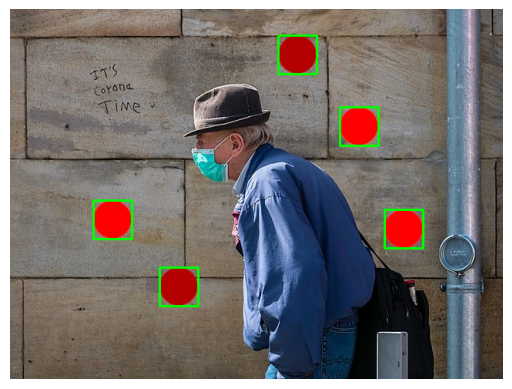

Ukupan broj pixela u bounding boxes je: 9546


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('z3_slika1.jpg')

hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Definisi neprirodnu crvenu boju
lower_unnatural_red = np.array([0, 150, 50])
upper_unnatural_red = np.array([10, 255, 255])

# Napravi masku za neprirodnu crvenu boju
unnatural_red_mask = cv2.inRange(hsv_image, lower_unnatural_red, upper_unnatural_red)

# Napravi konture u binarnoj masci
contours, _ = cv2.findContours(unnatural_red_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

total_pixel_count = 0

# Nacrtaj zelene bounding boxes oko crvenih krugova i izbroji koliko ima pixela
for contour in contours:
    # Ignorisi male konture
    if cv2.contourArea(contour) > 100:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Izbroj koliko je pixela
        roi = unnatural_red_mask[y:y+h, x:x+w]
        pixel_count = np.sum(roi == 255)

        total_pixel_count += pixel_count

# Pokazi sliku i bounding boxes
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Ispisi ukupan broj pixela
print(f'Ukupan broj pixela u bounding boxes je: {total_pixel_count}')


Kocka Nadjen u z4_slika1.png. Broj: 4


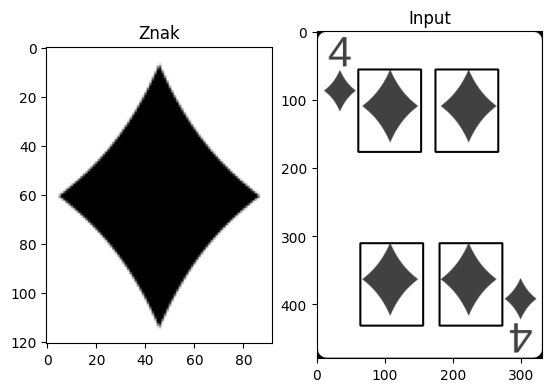

Srce Nadjen u z4_slika2.jpg. Broj: 13


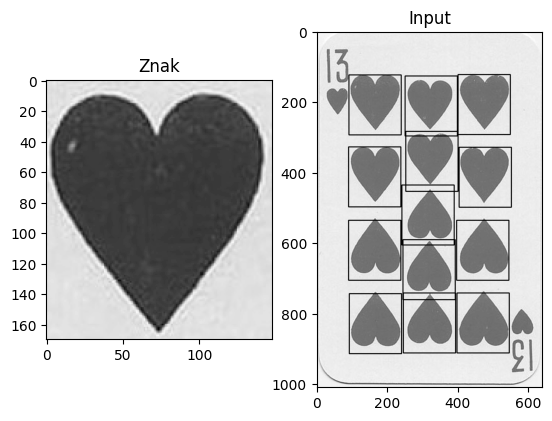

List Nadjen u z4_slika3.png. Broj: 5


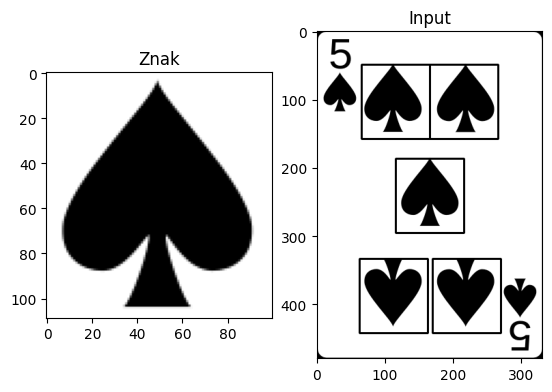

In [ ]:
# Zadatak 4
import cv2
from PIL import Image
from IPython.display import display

from imutils.object_detection import non_max_suppression

# Ne radi samo ako smanjim treshold...trazim slike koje su naopacke
def match_template(image, template_path):
    # Ubacujem sliku
    template = cv2.imread(template_path, 0)
    # Reversujem order w i h
    w, h = template.shape[::-1]

    # Matchuj template
    res = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
    threshold = 0.8
    loc = np.where(res >= threshold)

    # Napravi bounding box
    rectangles = []
    for pt in zip(*loc[::-1]):
        rectangles.append([int(pt[0]), int(pt[1]), int(pt[0] + w), int(pt[1] + h)])

    # Flipuj templejt
    template_flipped = cv2.flip(template, -1)

    # Matchuj sa flipovanim templejtom
    res_flipped = cv2.matchTemplate(image, template_flipped, cv2.TM_CCOEFF_NORMED)
    loc_flipped = np.where(res_flipped >= threshold)

    # Nacrtaj bounding box za fliopvane matcheve
    for pt in zip(*loc_flipped[::-1]):
        rectangles.append([int(pt[0]), int(pt[1]), int(pt[0] + w), int(pt[1] + h)])

    # Non-max supression da ne bi doslo do duplikata
    rectangles = np.array(rectangles)
    pick = non_max_suppression(rectangles, probs=None, overlapThresh=0.5)

    # Nacrtaj bounding boxes
    for (startX, startY, endX, endY) in pick:
        cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)

    return len(pick), image, template

import cv2
import numpy as np

def main():
    # Definisi templejtove
    templates = {
        'z4_slika1_template.png': 'Kocka',
        'z4_slika2_template.jpg': 'Srce',
        'z4_slika3_template.png': 'List'
    }

    # Input
    image_files = ['z4_slika1.png', 'z4_slika2.jpg', 'z4_slika3.png']

    # Loopuj kroz input
    for image_file in image_files:

        img = cv2.imread(image_file, 0)

        # Postoji li slika?
        if img is None:
            print(f"Neuspeli import slike {image_file}")
            continue

        for template_path, template_name in templates.items():
            count, img_with_boxes, template = match_template(img, template_path)
            if count > 0:
                print(f"{template_name} Nadjen u {image_file}. Broj: {count}")

                # Pokazi slike
                plt.subplot(1, 2, 1)
                plt.imshow(template, cmap='gray')
                plt.title('Znak')

                plt.subplot(1, 2, 2)
                plt.imshow(img_with_boxes, cmap='gray')
                plt.title('Input')
                plt.show()

if __name__ == "__main__":
    main()

In [ ]:
#!pip install easyocr
import easyocr
import cv2
from skimage import exposure

# Napravimo reader za OCR.
reader = easyocr.Reader(['en'])

# Dictionary da cuvamo tekst
images_text = {}

image_files = ["z5_slika1.jpg", "z5_slika2.jpg", "z5_slika3.JPG", "z5_slika4.jpg"]

for image_file in image_files:

    image = cv2.imread(image_file)

    # Proveravamo jesu li slike importovane
    if image is None:
        print(f"Neuspesan import {image_file}")
        continue

    # Gledamo samo veca slova na slici, za velike slike jos veca
    min_height = 250 if image.shape[1] > 2048 else 50

    # Konvert u grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Koristimo Easy OCR da citamo tekst
    results = reader.readtext(gray_image)

    # Izbacujemo mali tekst
    text = [result[1] for result in results if result[0][3][1] - result[0][0][1] > min_height]

    # Joinujemo slova
    text = ' '.join(text)

    # Ubacujemo u
    images_text[image_file] = (image, text)

    # Print
    print(f"Text from {image_file}:")
    print(text)
    print("\n")

# Uporedi tekst (lowercase) i matchuj histograme
for image_file1, (image1, text1) in images_text.items():
    for image_file2, (image2, text2) in images_text.items():
        if image_file1 != image_file2 and text1.lower() == text2.lower():
            # Matchuj
            matched_image = exposure.match_histograms(image1, image2, multichannel=True)

            # Sacuvaj matchovanu sliku
            cv2.imwrite(f"matched_{image_file1}_{image_file2}.jpg", matched_image)

# Program i dalje neuspesno cita tekst sa 4. slike, i treba mu dugo, radi sa prve dve matching okej.

Text from z5_slika1.jpg:
bonmarche


Text from z5_slika2.jpg:
Bonmarche


Text from z5_slika3.JPG:
Dunkin' Donuts 1


Text from z5_slika4.jpg:
OULILP OOIUUS 3




<ipython-input-6-64f8d97e1899>:51: FutureWarning: `multichannel` is a deprecated argument name for `match_histograms`. It will be removed in version 1.0. Please use `channel_axis` instead.
  matched_image = exposure.match_histograms(image1, image2, multichannel=True)
